Importing packages. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from get_regression_coefs_general import get_regression_coefs 

A ( i ) -- Trend Calculaion of the real GDP 

/var/folders/_t/z132y2ln4dgdr_lh84n_mz4w0000gn/T/ipykernel_481/2323194307.py:68: RuntimeWarning: invalid value encountered in log
  yhat = np.log(Yhat)


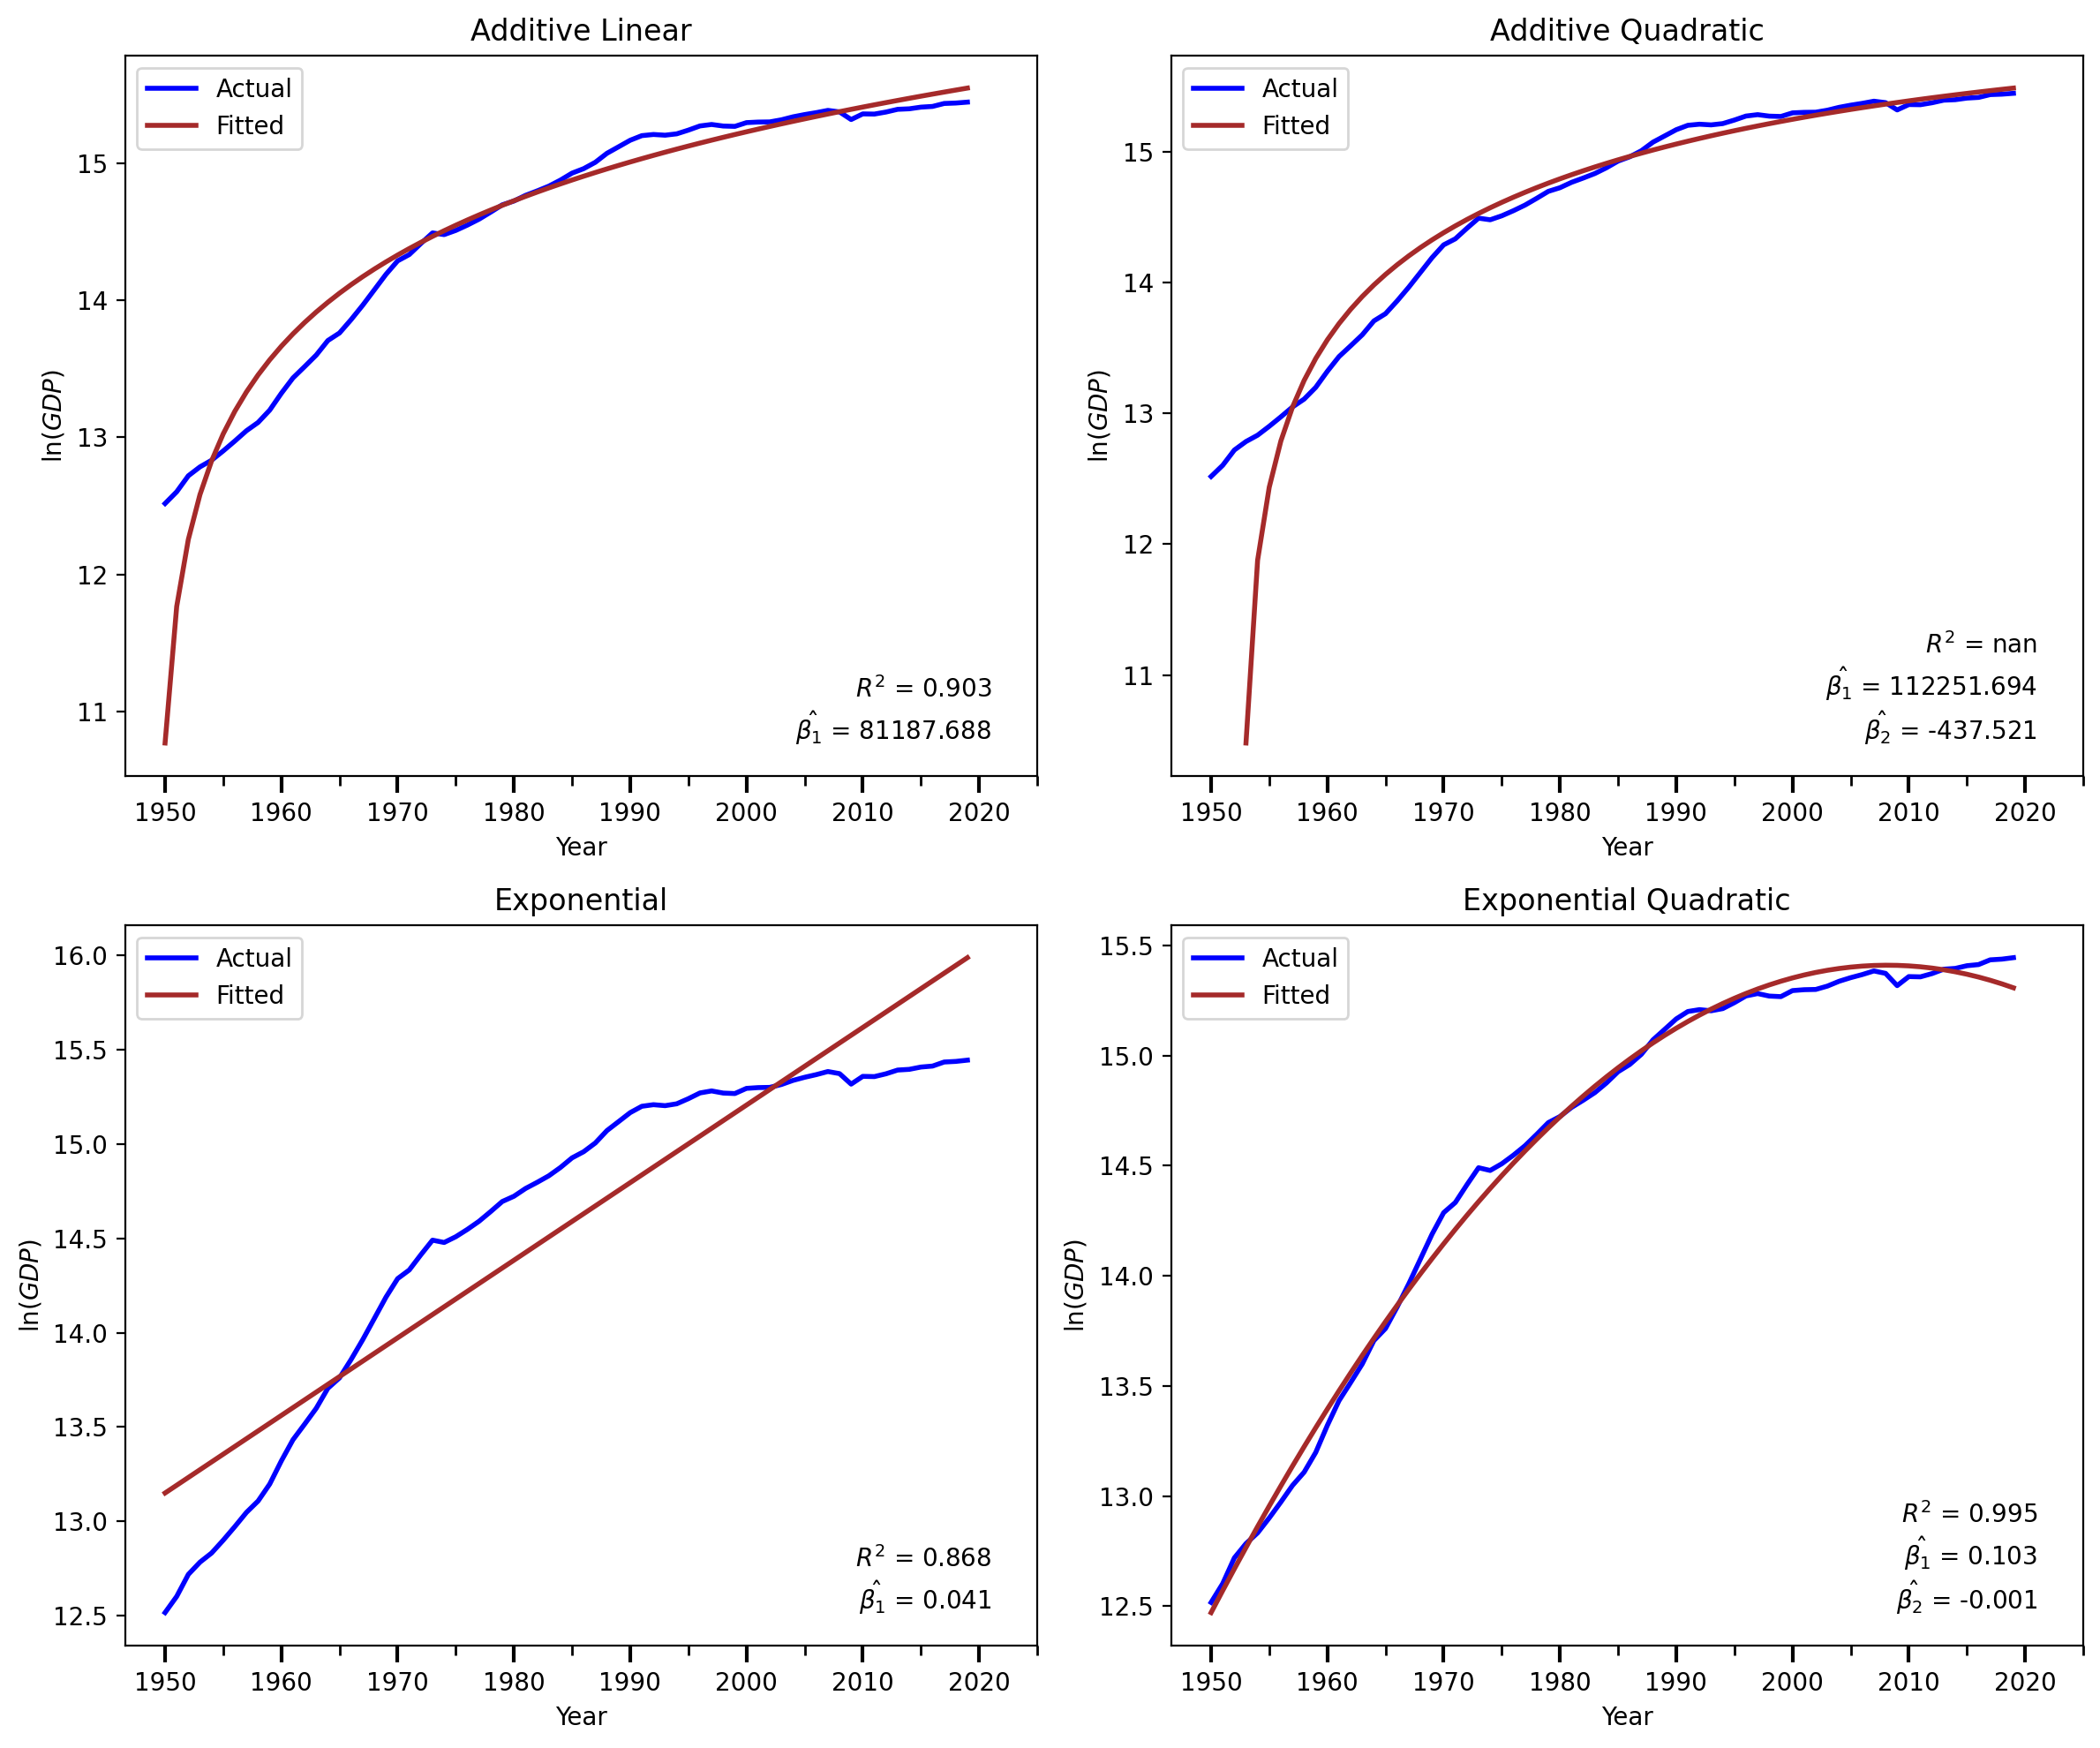

In [2]:
# Load dataset
file_path = 'PWT-data.xlsx'
data = pd.read_excel(file_path, sheet_name='Data', header=0)
data = data.loc[data["country"] == "Japan", ["year", "rgdpna"]].reset_index(drop=True)

# Defining time range
ymax = 2019
ymin = 1950
data = data[(data["year"] >= ymin) & (data["year"] <= ymax)].reset_index(drop=True)

# Preparing data
years = data["year"].values
T = len(years)
T_all = ymax - ymin + 1
log_gdp = np.log(data["rgdpna"].values)  # Log-transformed real GDP

# Function to calculate predictions
def calculate_predictions(coefficients, *regressors):
    Yhat = np.empty(T_all)
    for t in range(T_all):
        Yhat[t] = sum(coefficients[i] * regressors[i][t] for i in range(len(regressors)))
    return Yhat

# Function to calculate R-squared
def calculate_r_squared(actual, predicted):
    ss_total = np.sum((actual - np.mean(actual)) ** 2)
    ss_residual = np.sum((actual - predicted) ** 2)
    return 1 - (ss_residual / ss_total)

# Plotting
def plot_results(ax, model_name, actual, predicted, r2, beta_1, beta_2=None):
    ax.plot(years, actual, label="Actual", color="blue", linewidth=2)
    ax.plot(years, predicted[:T], label="Fitted", color="brown", linewidth=2)
    ax.set_title(model_name)
    ax.set_xlabel("Year")
    ax.set_ylabel(r"$\ln(GDP)$")

    ax.set_xticks(np.arange(1950, 2030, 10))
    ax.set_xticks(np.arange(1950, 2030, 5), minor=True)
    ax.tick_params(axis='x', which='major', length=7, width=1.5, labelsize=10)
    ax.tick_params(axis='x', which='minor', length=4, width=1)

    ax.legend(loc='upper left', frameon=True, fontsize=10)

    # Adding text for R², β₁, and β₂
    text = f"$R^2$ = {r2:.3f}\n$\\hat{{\\beta_1}}$ = {beta_1:.3f}"
    if beta_2 is not None:
        text += f"\n$\\hat{{\\beta_2}}$ = {beta_2:.3f}"
    ax.text(0.95, 0.05, text, fontsize=10, ha='right', transform=ax.transAxes)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10), dpi=200)
axs = axs.ravel()

# 1) Additive Linear: yt = β0 + β1t + ut
x1 = np.ones(T)
x2 = np.arange(1, T + 1)
coeffs = get_regression_coefs(data["rgdpna"].values, x1, x2)
Yhat = calculate_predictions(coeffs, x1, x2)
yhat = np.log(Yhat)
r2 = calculate_r_squared(log_gdp, yhat[:T])
plot_results(axs[0], "Additive Linear", log_gdp, yhat, r2, coeffs[1])

# 2) Additive Quadratic: yt = β0 + β1t + β2t² + ut
x3 = np.arange(1, T + 1) ** 2
coeffs = get_regression_coefs(data["rgdpna"].values, x1, x2, x3)
Yhat = calculate_predictions(coeffs, x1, x2, x3)
yhat = np.log(Yhat)
r2 = calculate_r_squared(log_gdp, yhat[:T])
plot_results(axs[1], "Additive Quadratic", log_gdp, yhat, r2, coeffs[1], coeffs[2])

# 3) Exponential: log(yt) = β0 + β1t + ut
coeffs = get_regression_coefs(np.log(data["rgdpna"].values), x1, x2)
yhat = calculate_predictions(coeffs, x1, x2)
r2 = calculate_r_squared(log_gdp, yhat[:T])
plot_results(axs[2], "Exponential", log_gdp, yhat, r2, coeffs[1])

# 4) Exponential Quadratic: log(yt) = β0 + β1t + β2t² + ut
coeffs = get_regression_coefs(np.log(data["rgdpna"].values), x1, x2, x3)
yhat = calculate_predictions(coeffs, x1, x2, x3)
r2 = calculate_r_squared(log_gdp, yhat[:T])
plot_results(axs[3], "Exponential Quadratic", log_gdp, yhat, r2, coeffs[1], coeffs[2])

plt.tight_layout()
plt.show()


A ( ii ) -- Trend Calculaion of the real GDP per capita

/var/folders/_t/z132y2ln4dgdr_lh84n_mz4w0000gn/T/ipykernel_481/3745393688.py:71: RuntimeWarning: invalid value encountered in log
  yhat = np.log(Yhat)


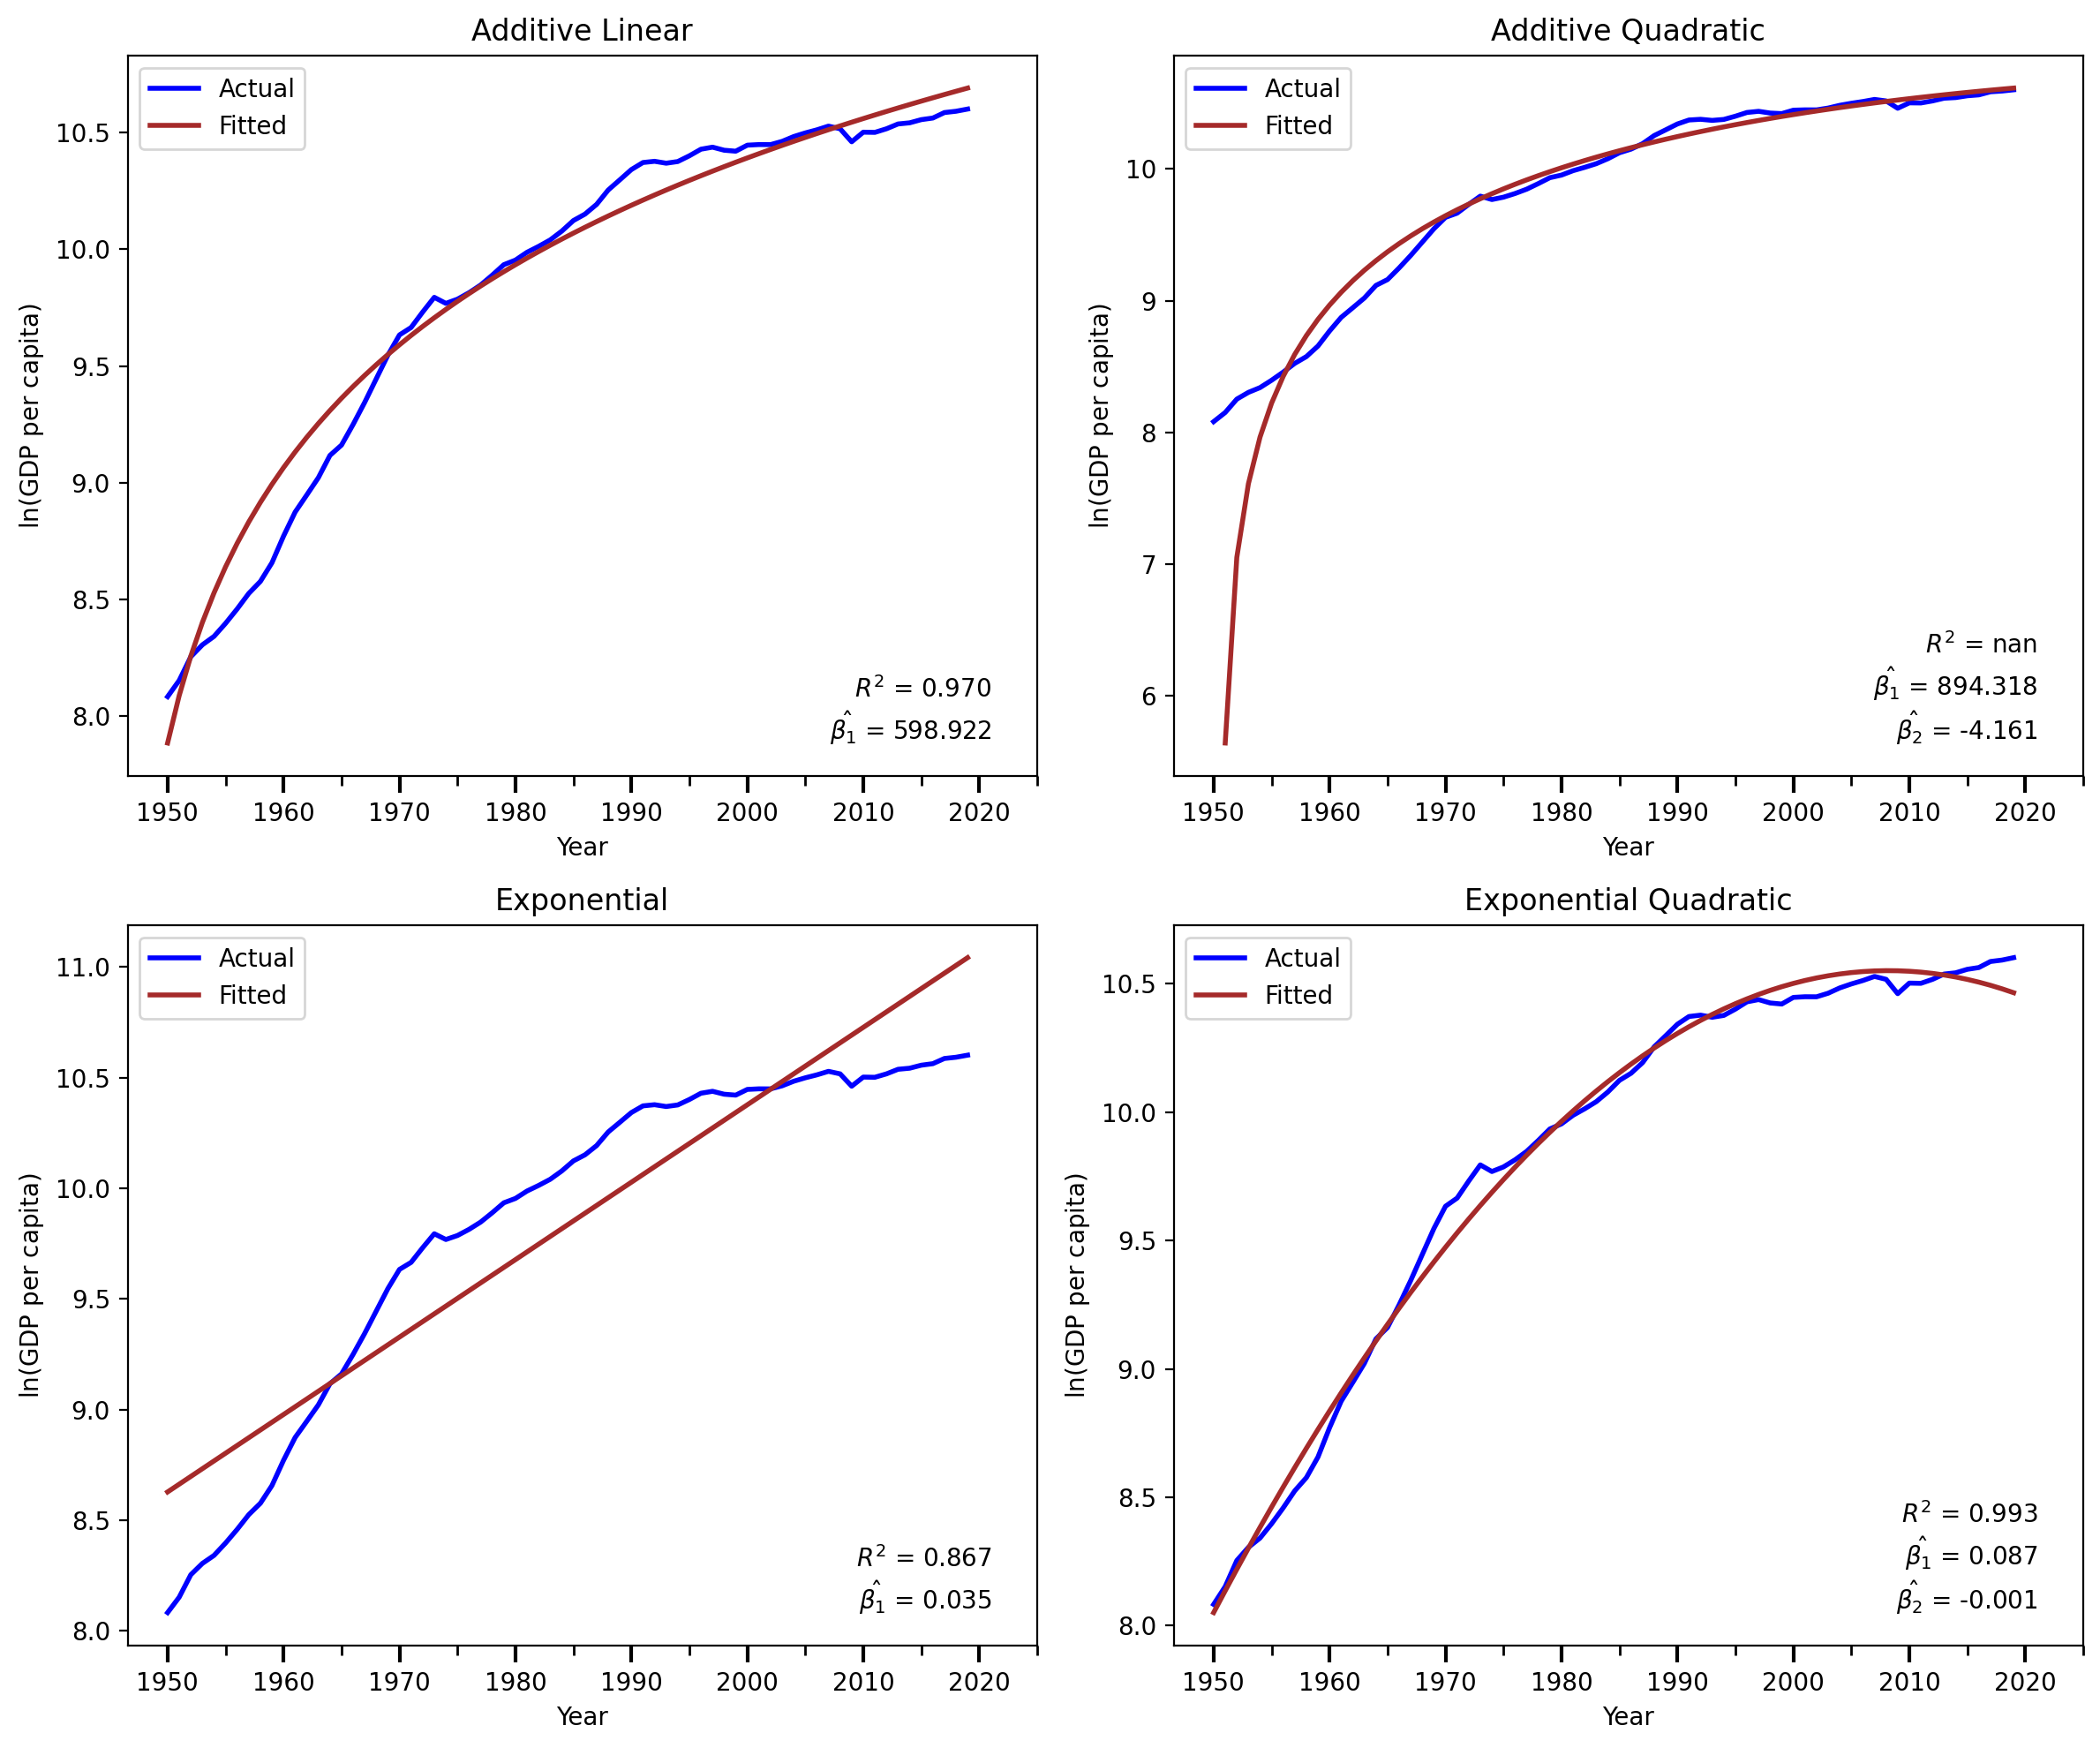

In [3]:
# Loading dataset
file_path = 'PWT-data.xlsx'
data = pd.read_excel(file_path, sheet_name='Data', header=0)

# Filtering for Japan and relevant columns
data = data.loc[data["country"] == "Japan", ["year", "rgdpna", "pop"]].reset_index(drop=True)

# Calculating real GDP per capita
data["rgdp_pc"] = data["rgdpna"] / data["pop"]

# Defining year range
ymax = 2019
ymin = 1950
data = data[(data["year"] >= ymin) & (data["year"] <= ymax)].reset_index(drop=True)

years = data["year"].values
T = len(years)
T_all = ymax - ymin + 1
log_gdp_pc = np.log(data["rgdp_pc"].values)  # Log-transformed GDP per capita

# Function to calculate predictions
def calculate_predictions(coefficients, *regressors):
    Yhat = np.empty(T_all)
    for t in range(T_all):
        Yhat[t] = sum(coefficients[i] * regressors[i][t] for i in range(len(regressors)))
    return Yhat

# Function to calculate R-squared
def calculate_r_squared(actual, predicted):
    ss_total = np.sum((actual - np.mean(actual)) ** 2)
    ss_residual = np.sum((actual - predicted) ** 2)
    return 1 - (ss_residual / ss_total)

# Plotting function
def plot_results(ax, model_name, actual, predicted, r2, beta_1, beta_2=None):
    ax.plot(years, actual, label="Actual", color="blue", linewidth=2)
    ax.plot(years, predicted[:T], label="Fitted", color="brown", linewidth=2)
    ax.set_title(model_name)
    ax.set_xlabel("Year")
    ax.set_ylabel(r"$\ln(\text{GDP}\ \text{per}\ \text{capita})$")

    ax.set_xticks(np.arange(1950, 2030, 10))
    ax.set_xticks(np.arange(1950, 2030, 5), minor=True)
    ax.tick_params(axis='x', which='major', length=7, width=1.5, labelsize=10)
    ax.tick_params(axis='x', which='minor', length=4, width=1)

    ax.legend(loc='upper left', frameon=True, fontsize=10)

    # Adding text for R², β₁, and β₂
    text = f"$R^2$ = {r2:.3f}\n$\\hat{{\\beta_1}}$ = {beta_1:.3f}"
    if beta_2 is not None:
        text += f"\n$\\hat{{\\beta_2}}$ = {beta_2:.3f}"
    ax.text(0.95, 0.05, text, fontsize=10, ha='right', transform=ax.transAxes)

fig, axs = plt.subplots(2, 2, figsize=(12, 10), dpi=200)
axs = axs.ravel()

# 1) Additive Linear: yt = β0 + β1t + ut
x1 = np.ones(T)
x2 = np.arange(1, T + 1)
coeffs = get_regression_coefs(data["rgdp_pc"].values, x1, x2)
Yhat = calculate_predictions(coeffs, x1, x2)
yhat = np.log(Yhat)
r2 = calculate_r_squared(log_gdp_pc, yhat[:T])
plot_results(axs[0], "Additive Linear", log_gdp_pc, yhat, r2, coeffs[1])

# 2) Additive Quadratic: yt = β0 + β1t + β2t² + ut
x3 = np.arange(1, T + 1) ** 2
coeffs = get_regression_coefs(data["rgdp_pc"].values, x1, x2, x3)
Yhat = calculate_predictions(coeffs, x1, x2, x3)
yhat = np.log(Yhat)
r2 = calculate_r_squared(log_gdp_pc, yhat[:T])
plot_results(axs[1], "Additive Quadratic", log_gdp_pc, yhat, r2, coeffs[1], coeffs[2])

# 3) Exponential: log(yt) = β0 + β1t + ut
coeffs = get_regression_coefs(np.log(data["rgdp_pc"].values), x1, x2)
yhat = calculate_predictions(coeffs, x1, x2)
r2 = calculate_r_squared(log_gdp_pc, yhat[:T])
plot_results(axs[2], "Exponential", log_gdp_pc, yhat, r2, coeffs[1])

# 4) Exponential Quadratic: log(yt) = β0 + β1t + β2t² + ut
coeffs = get_regression_coefs(np.log(data["rgdp_pc"].values), x1, x2, x3)
yhat = calculate_predictions(coeffs, x1, x2, x3)
r2 = calculate_r_squared(log_gdp_pc, yhat[:T])
plot_results(axs[3], "Exponential Quadratic", log_gdp_pc, yhat, r2, coeffs[1], coeffs[2])

plt.tight_layout()
plt.show()


B -- Extracting TFP measure 


We use the standard Cobb-Douglas production function:

𝑌=𝐴 * 𝐾^𝛼 * (ℎ𝐿)^ (1−𝛼). 

where  𝑌  denotes the aggregate output,  𝐴  is TFP,  𝐾  is the aggregate capital stock, h is the human capital, and  𝐿  denotes labour (total number of workers).

We assume  𝛼=0.3  and create the time series of TFP defined as:

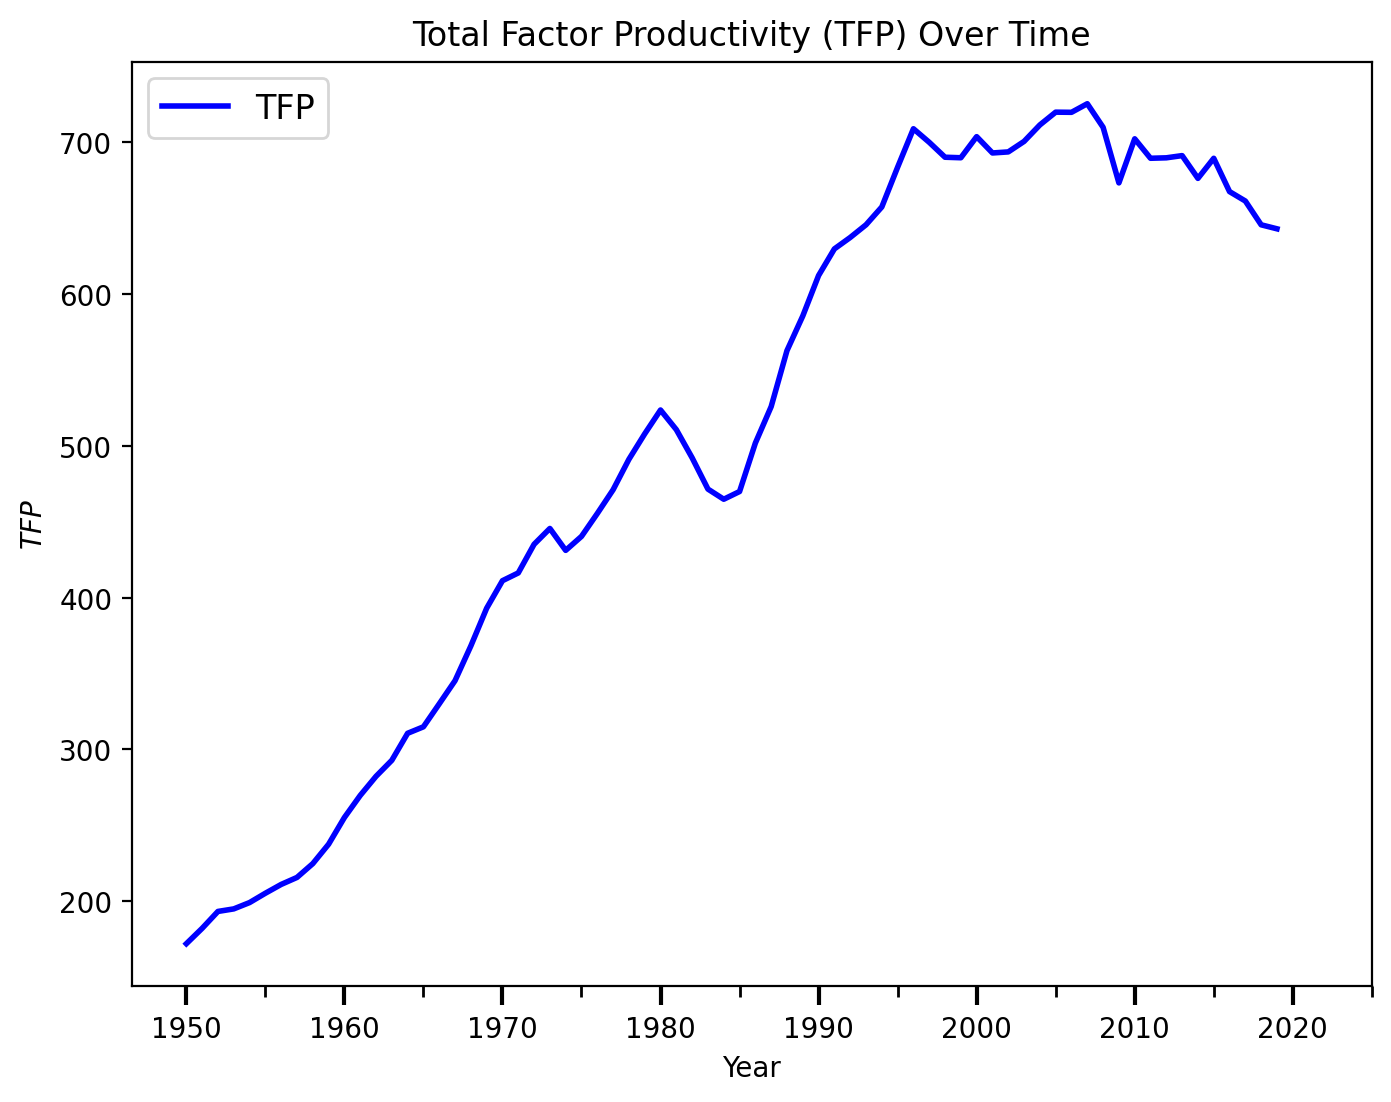

In [4]:
data = pd.read_excel(file_path, sheet_name='Data', header=0)

# Filtering for Japan and relevant columns
data = data.loc[data["country"] == "Japan", ["year", "rgdpo", "rnna", "emp", "hc"]].reset_index(drop=True)

# Defining capital share (alpha)
alpha = 0.3

# Calculating TFP using the provided formula
def calculate_tfp(alpha, T):
    TFP = np.zeros(T)
    for t in range(T):
        TFP[t] = data["rgdpo"].iloc[t] / (
            (data["rnna"].iloc[t] ** alpha) * ((data["hc"].iloc[t] * data["emp"].iloc[t]) ** (1 - alpha))
        )
    return TFP

# Calculating TFP for the available time period
T = len(data) 
data["tfp"] = calculate_tfp(alpha, T)

years = data["year"].values
tfp_values = data["tfp"].values

plt.figure(figsize=(8, 6), dpi=200)

plt.plot(years, tfp_values, label="TFP", color="blue", linewidth=2)

plt.title("Total Factor Productivity (TFP) Over Time")
plt.xlabel("Year")
plt.ylabel(r"$TFP$")

# Setting major ticks every 10 years and minor ticks every 5 years
plt.xticks(np.arange(1950, 2030, 10))
plt.gca().set_xticks(np.arange(1950, 2030, 5), minor=True)

plt.tick_params(axis='x', which='major', length=7, width=1.5, labelsize=10)
plt.tick_params(axis='x', which='minor', length=4, width=1)

plt.legend(loc='upper left', frameon=True, fontsize=12)

plt.grid(False)

plt.show()

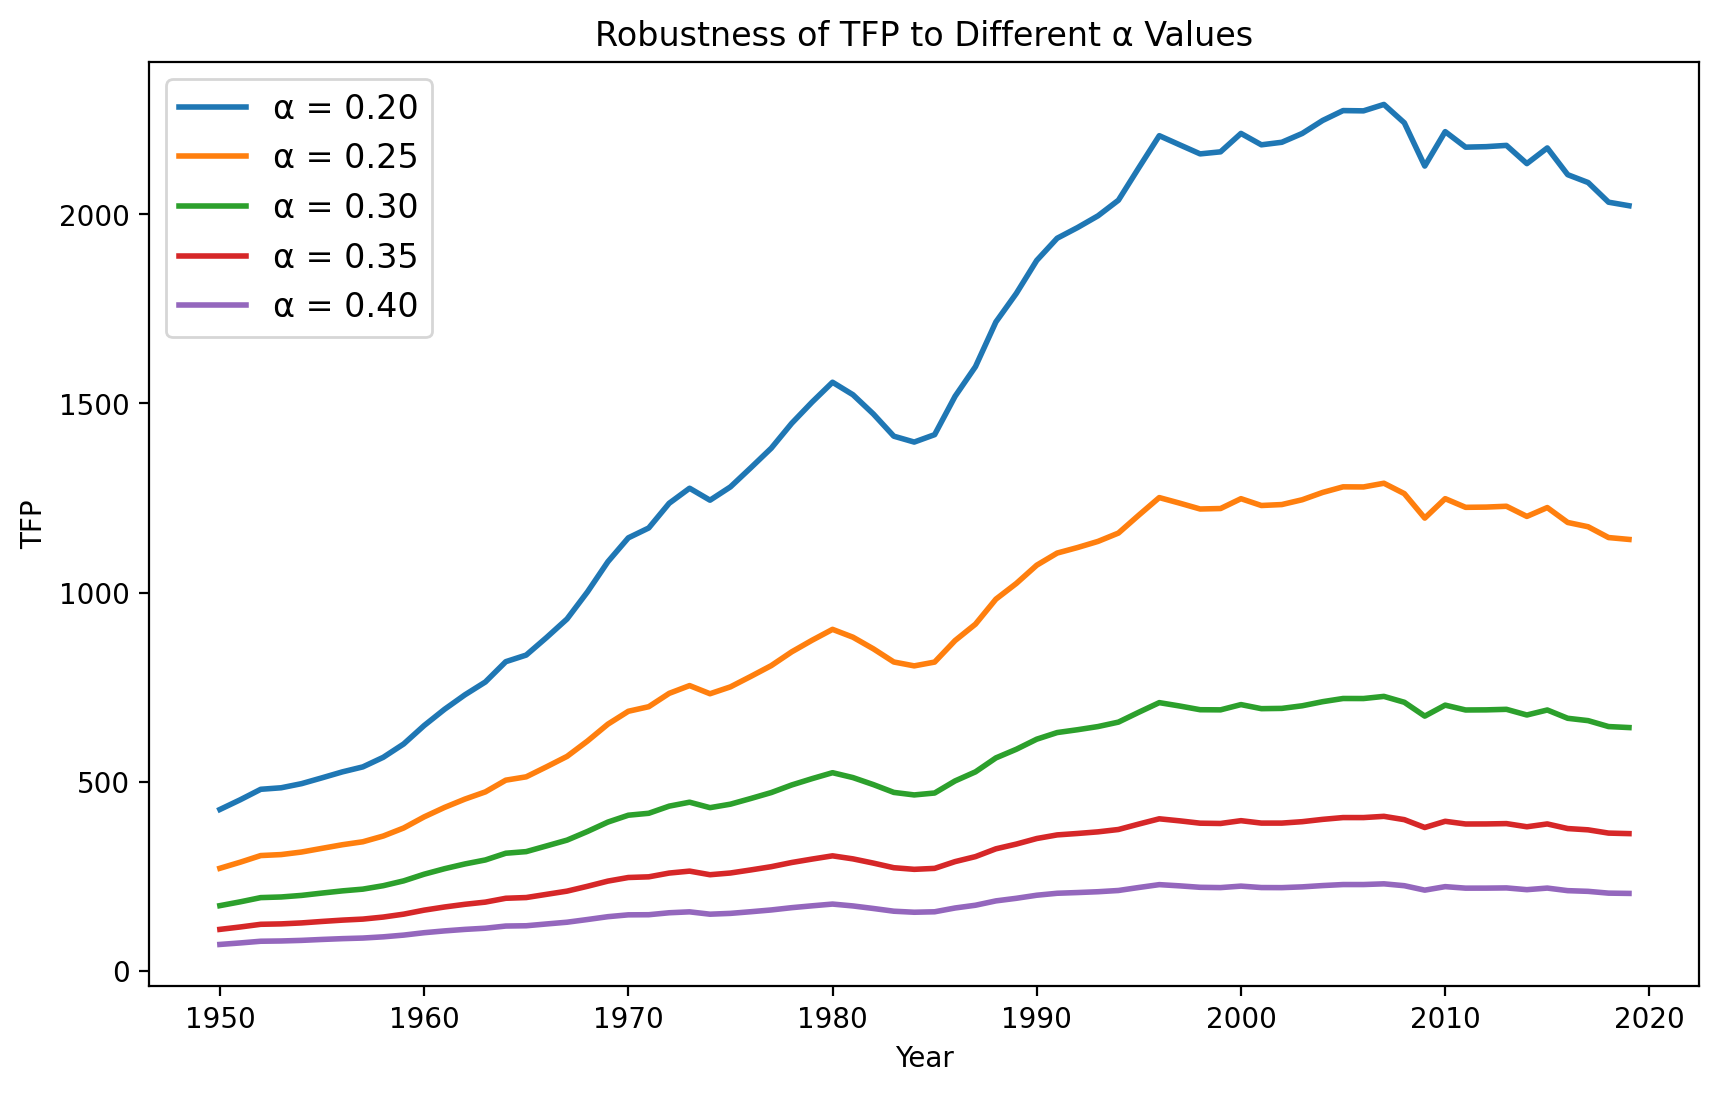

In [5]:
data = pd.read_excel(file_path, sheet_name='Data', header=0)

# Filtering for Japan and relevant columns
data = data.loc[data["country"] == "Japan", ["year", "rgdpo", "rnna", "emp", "hc"]].reset_index(drop=True)

# Function to calculate TFP for a given alpha
def calculate_tfp(alpha, T):
    TFP = np.zeros(T)
    for t in range(T):
        TFP[t] = data["rgdpo"].iloc[t] / (
            (data["rnna"].iloc[t] ** alpha) * ((data["hc"].iloc[t] * data["emp"].iloc[t]) ** (1 - alpha))
        )
    return TFP

# Testing alternative alpha values
alpha_values = [0.2, 0.25, 0.3, 0.35, 0.4]  
T = len(data) 

# Calculating TFP for each alpha and storing results
tfp_results = {}
for alpha in alpha_values:
    tfp_results[alpha] = calculate_tfp(alpha, T)

# Plotting    
plt.figure(figsize=(10, 6), dpi=200)
for alpha, tfp in tfp_results.items():
    plt.plot(data["year"], tfp, label=f"α = {alpha:.2f}", linewidth=2)  # Plot TFP for each alpha

plt.title("Robustness of TFP to Different α Values")
plt.xlabel("Year")
plt.ylabel("TFP")
plt.legend(loc="upper left", frameon=True, fontsize=12)

plt.grid(False)
plt.show()


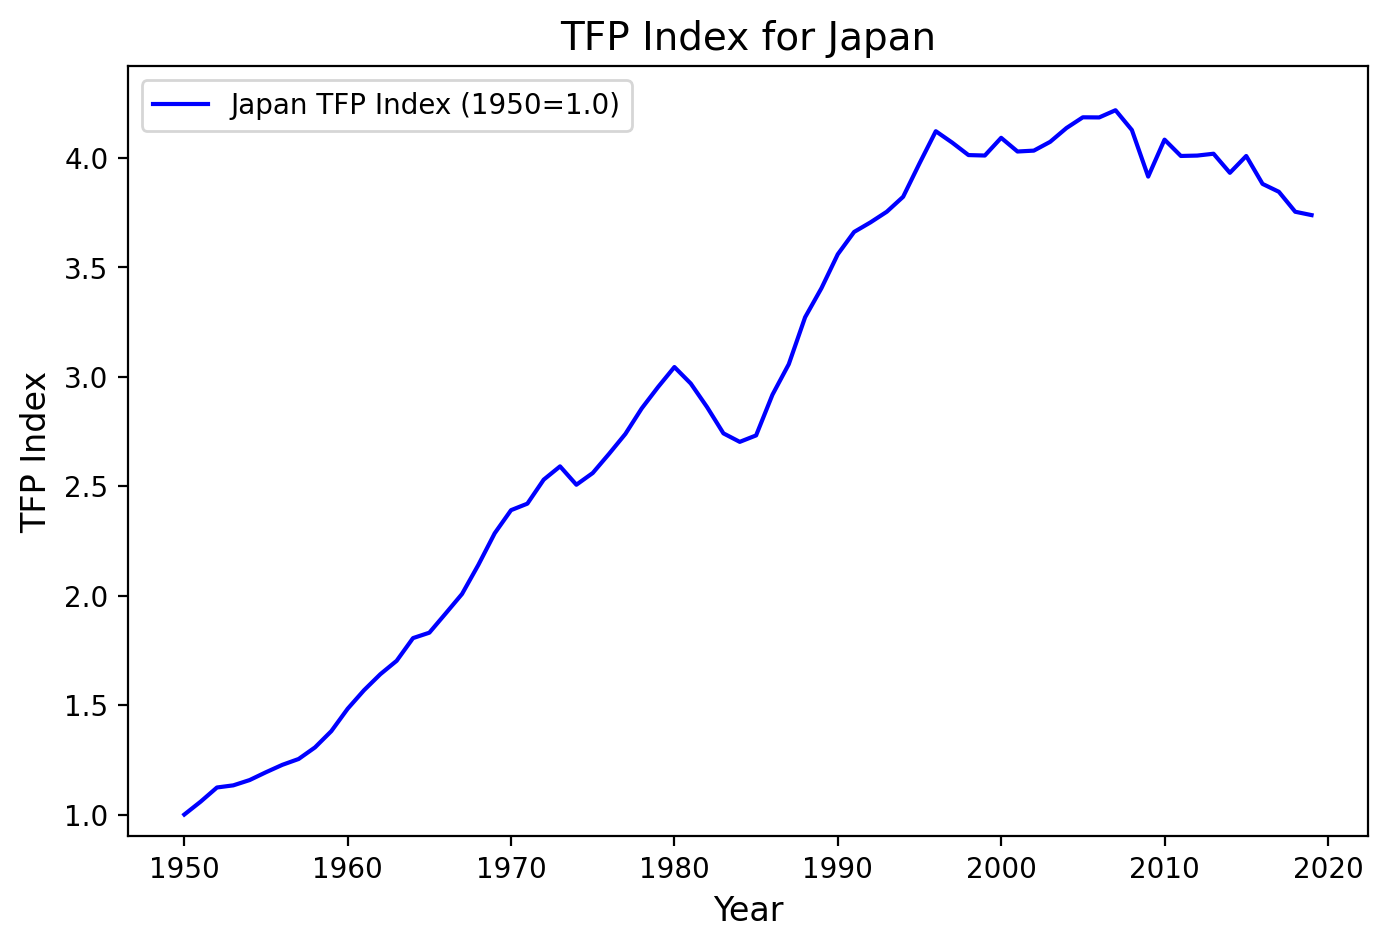

In [13]:
# Calculating TFP index (1950=1)
tfp_index = data["tfp"] / data["tfp"].iloc[0]

plt.figure(figsize=(8, 5), dpi=200)
plt.plot(data["year"], tfp_index, label="Japan TFP Index (1950=1.0)", color="blue", lw=1.5)
plt.xlabel("Year", fontsize=12)
plt.ylabel("TFP Index", fontsize=12)
plt.title("TFP Index for Japan", fontsize=14)
plt.ylim(0.9, tfp_index.max() + 0.2)  # Adjust y-axis range
plt.grid(alpha=0.3)
plt.legend(loc="upper left", fontsize=10)
plt.grid(False)
plt.show()

C -- Growth Accounting

In [9]:
data = pd.read_excel(file_path, sheet_name='Data', header=0)

# Filtering for Japan and relevant columns
data = data.loc[data["country"] == "Japan", ["year", "rgdpo", "rnna", "emp", "hc"]].reset_index(drop=True)

# Defining capital share (alpha)
alpha = 0.3

# Calculating TFP (A)
data["tfp"] = data["rgdpo"] / (
            (data["rnna"] ** alpha) * ((data["hc"] * data["emp"]) ** (1 - alpha))
        )

# Converting variables to arrays
Y = data["rgdpo"].values
K = data["rnna"].values
L = (data["emp"] * data["hc"]).values
h = data["hc"].values
A = data["tfp"].values
years = data["year"].values

# Function to compute log growth rates
def compute_growth_rate(X):
    return np.log(X[1:] / X[:-1])

# Calculating log growth rates for Y, A, K, and L
dY = compute_growth_rate(Y)
dK = compute_growth_rate(K)
dL = compute_growth_rate(L)
dA = compute_growth_rate(A)

# Calculating contributions
contrib_dK = alpha * dK / dY
contrib_dL = (1 - alpha) * dL / dY
contrib_dA = dA / dY

# Creating yearly intervals
intvls = np.array([f"{y1}-{y2}" for y1, y2 in zip(years[:-1], years[1:])])

# Combining results into a DataFrame
df_contribs = pd.DataFrame({
    "Year": intvls,
    "K Contribution": contrib_dK,
    "L Contribution": contrib_dL,
    "A Contribution": contrib_dA
})

# Calculating the sum of contributions
df_contribs["Sum"] = df_contribs["K Contribution"] + df_contribs["L Contribution"] + df_contribs["A Contribution"]

# Checking if contributions sum to 1
if not np.allclose(df_contribs["Sum"], 1, atol=1e-5):
    print("\nWarning: Contributions do not sum to 1 for all intervals.")
    print(df_contribs[df_contribs["Sum"] != 1])

# Displaying the contributions table
pd.set_option("display.float_format", "{:.4f}".format)
print("\n== Contributions Table ==\n")
print(df_contribs)


== Contributions Table ==

         Year  K Contribution  L Contribution  A Contribution    Sum
0   1950-1951          0.1585          0.2697          0.5718 1.0000
1   1951-1952          0.1157          0.2714          0.6129 1.0000
2   1952-1953          0.2243          0.5779          0.1978 1.0000
3   1953-1954          0.2272          0.3636          0.4092 1.0000
4   1954-1955          0.1860          0.4168          0.3971 1.0000
..        ...             ...             ...             ...    ...
64  2014-2015          0.0678          0.1960          0.7361 1.0000
65  2015-2016         -0.0736         -0.3984          1.4720 1.0000
66  2016-2017          1.5562          6.7599         -7.3161 1.0000
67  2017-2018         -0.2280         -1.5620          2.7900 1.0000
68  2018-2019          0.3271          1.3304         -0.6575 1.0000

[69 rows x 5 columns]


In [10]:
# Load dataset
data = pd.read_excel(file_path, sheet_name='Data', header=0)

# Filtering for Japan and relevant columns
data = data.loc[data["country"] == "Japan", ["year", "rgdpo", "rnna", "emp", "hc"]].reset_index(drop=True)

# Defining capital share (alpha)
alpha = 0.3

# Calculating TFP (A)
data["tfp"] = data["rgdpo"] / (
    (data["rnna"] ** alpha) * ((data["hc"] * data["emp"]) ** (1 - alpha))
)

# Converting variables to arrays
Y = data["rgdpo"].values
K = data["rnna"].values
L = (data["emp"] * data["hc"]).values
h = data["hc"].values
A = data["tfp"].values
years = data["year"].values

# Function to compute log growth rates
def compute_growth_rate(X):
    return np.log(X[1:] / X[:-1])

# Calculating log growth rates for Y, A, K, and L
dY = compute_growth_rate(Y)
dK = compute_growth_rate(K)
dL = compute_growth_rate(L)
dA = compute_growth_rate(A)

# Creating yearly intervals
intvls = np.array([f"{y1}-{y2}" for y1, y2 in zip(years[:-1], years[1:])])

df_growths = pd.DataFrame({
    "Year": intvls,
    "Growth Y": dY,
    "Growth K": dK,
    "Growth L": dL,
    "Growth A": dA,
})


pd.set_option("display.float_format", "{:.4f}".format)
print("\n== Table with Growth Rates ==\n")
print(df_growths)


== Table with Growth Rates ==

         Year  Growth Y  Growth K  Growth L  Growth A
0   1950-1951    0.1002    0.0529    0.0386    0.0573
1   1951-1952    0.0968    0.0373    0.0375    0.0593
2   1952-1953    0.0437    0.0327    0.0361    0.0087
3   1953-1954    0.0516    0.0391    0.0268    0.0211
4   1954-1955    0.0766    0.0475    0.0456    0.0304
..        ...       ...       ...       ...       ...
64  2014-2015    0.0263    0.0059    0.0074    0.0194
65  2015-2016   -0.0220    0.0054    0.0125   -0.0324
66  2016-2017    0.0013    0.0066    0.0123   -0.0093
67  2017-2018   -0.0086    0.0065    0.0192   -0.0240
68  2018-2019    0.0062    0.0068    0.0118   -0.0041

[69 rows x 5 columns]


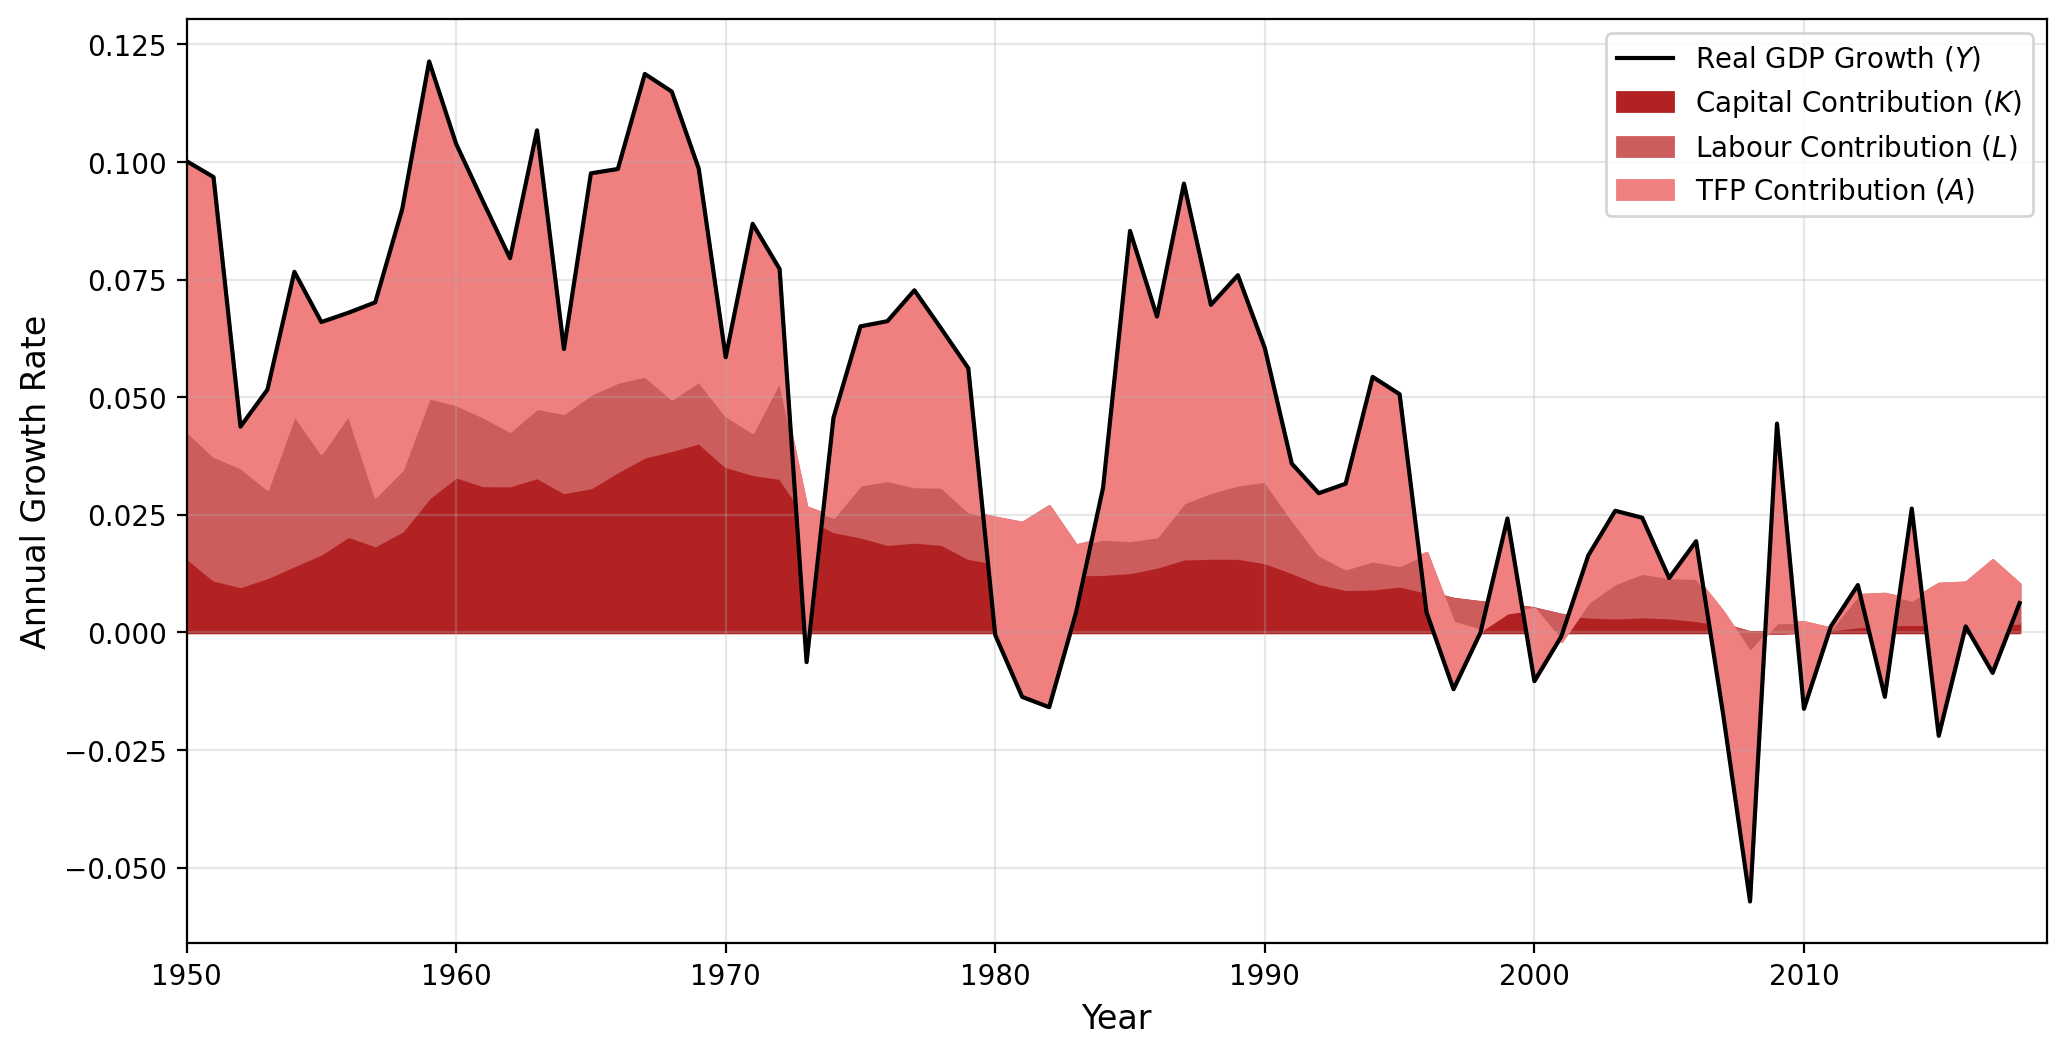

In [11]:
colors = {
    "K": "firebrick",        # Dark red for capital contribution
    "L": "indianred",        # Medium red for labor contribution
    "A": "lightcoral"        # Light red for TFP contribution
}

plt.figure(figsize=(12,6), dpi=200)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Annual Growth Rate", fontsize=12)

# Plotting Real GDP growth rate (Y) as a black line
plt.plot(years[:-1], dY, color="black", linewidth=1.5, label="Real GDP Growth ($Y$)")

# Stacked area for contributions
plt.fill_between(years[:-1], 0, alpha * dK, color=colors["K"], label="Capital Contribution ($K$)")
plt.fill_between(years[:-1], alpha * dK, (1 - alpha) * dL + alpha * dK, color=colors["L"], label="Labour Contribution ($L$)")
plt.fill_between(years[:-1], (1 - alpha) * dL + alpha * dK, dA + (1 - alpha) * dL + alpha * dK, color=colors["A"], label="TFP Contribution ($A$)")

plt.xlim(1950, 2019)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

plt.show()

In [12]:
# Dynamically generating periods for every decade, ending with the final year
def generate_periods(years, step=10):
    periods = []
    for i in range(0, len(years), step):
        end_idx = min(i + step, len(years) - 1) 
        periods.append((i, end_idx))
    return periods

# Function to calculate longer-period contributions
def longer_period_contributions(start_idx, end_idx):
    period = f"{years[start_idx]}-{years[end_idx]}"
    Y_growth = np.log(Y[end_idx] / Y[start_idx])
    K_contrib = alpha * np.log(K[end_idx] / K[start_idx]) / Y_growth
    L_contrib = (1 - alpha) * np.log(L[end_idx] / L[start_idx]) / Y_growth
    A_contrib = np.log(A[end_idx] / A[start_idx]) / Y_growth
    return period, K_contrib, L_contrib, A_contrib, Y_growth

# Generating periods with 10-year intervals, plus the final range to 2019
periods = generate_periods(years, step=10)

results = []
for start, end in periods:
    results.append(longer_period_contributions(start, end))

print("\n== Longer Period Contributions ==\n")
print("Year \t\t K Contrib \t L Contrib \t A Contrib \t Y Growth")
print("------- \t --------- \t --------- \t --------- \t --------")
for period, K_contrib, L_contrib, A_contrib, Y_growth in results:
    print(
        f"{period} \t {K_contrib:.4f} \t {L_contrib:.4f} \t {A_contrib:.4f} \t {Y_growth:.4f}"
    )


== Longer Period Contributions ==

Year 		 K Contrib 	 L Contrib 	 A Contrib 	 Y Growth
------- 	 --------- 	 --------- 	 --------- 	 --------
1950-1960 	 0.2153 	 0.2819 	 0.5028 	 0.7843
1960-1970 	 0.3503 	 0.1578 	 0.4918 	 0.9702
1970-1980 	 0.4103 	 0.1775 	 0.4122 	 0.5866
1980-1990 	 0.3501 	 0.2574 	 0.3926 	 0.3983
1990-2000 	 0.3400 	 0.1605 	 0.4995 	 0.2788
2000-2010 	 0.4667 	 0.5694 	 -0.0361 	 0.0562
2010-2019 	 -0.8490 	 -3.9084 	 5.7574 	 -0.0153


D -- Constructing a series for labour productivity, using real GDP per worker as a measure

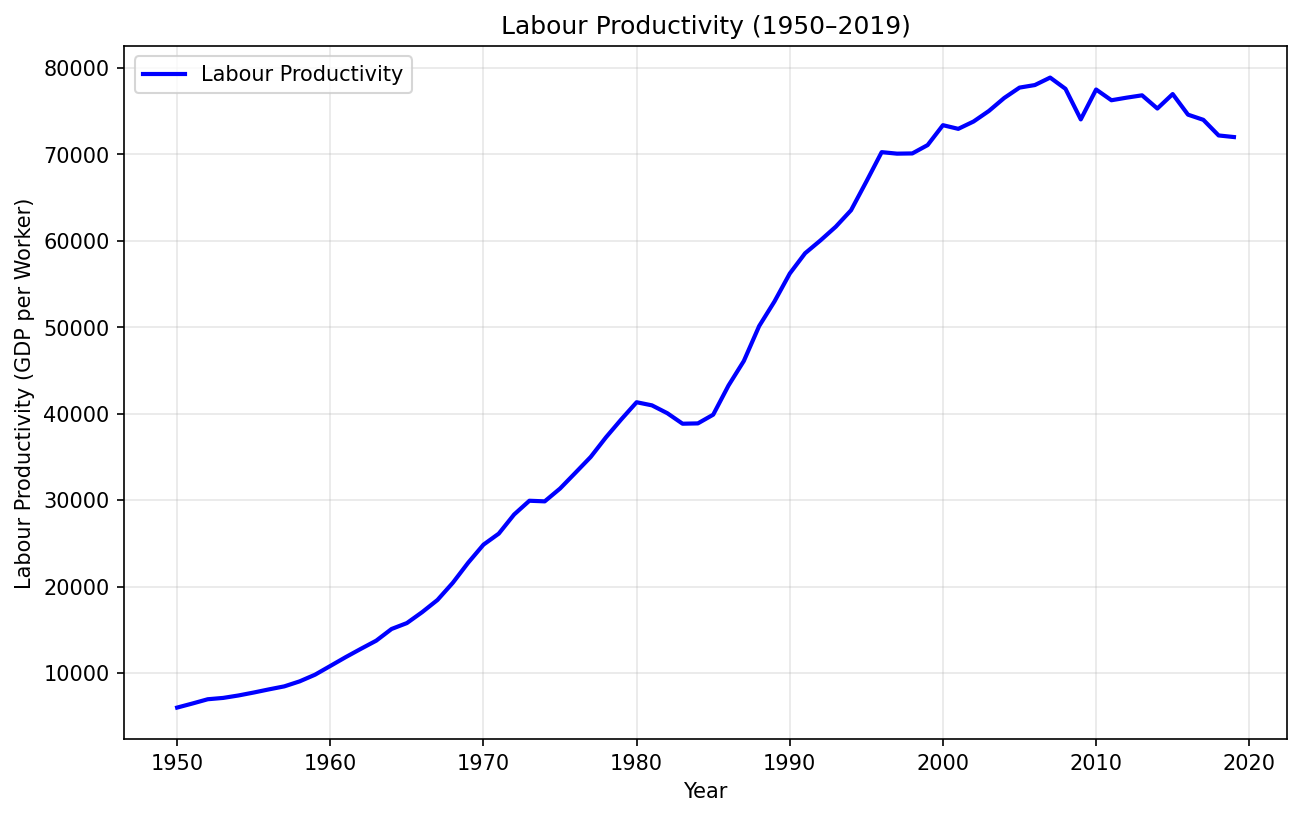

In [13]:
# Calculate labour productivity (GDP per worker)
data["labour_productivity"] = data["rgdpo"] / data["emp"]

# Convert to a NumPy array for further analysis if needed
labour_productivity = data["labour_productivity"].values

# Optionally, plot the series to visualize trends
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6), dpi=150)
plt.plot(data["year"], data["labour_productivity"], label="Labour Productivity", color="blue", linewidth=2)
plt.xlabel("Year")
plt.ylabel("Labour Productivity (GDP per Worker)")
plt.title("Labour Productivity (1950–2019)")
plt.grid(alpha=0.3)
plt.legend()
plt.show()